# Murmurations for curves with complex multiplication
-----------------------------------------------------
In this notebook, we consider curves with complex multiplication.
As an example, we consider curves of the form $y^2 = x^3+D$ for $D=-10000,\ldots,10000$,
which has complex multiplication by the ring $\mathbb{Z}[(1 + \sqrt{-3})/2]$.
As the conductor of these curves grows very fast, the murmurations we see are very slight.
I hope to find a way to calculate $a_p(E)$ for these curves much faster in the future, which would hopefully allow us to completely see any murmurations for these curves.

In [0]:
## if running from google colab uncomment:
## !pip install -q ipympl
## from google.colab import output
## output.enable_custom_widget_manager()

In [0]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
%matplotlib widget

In [0]:
## uncomment the next line if running this notebook locally
## from pyscript.murmur_from_dataframe import bin_murmuration, display_murmuration, display_rescaled_murmuration

## uncomment the next lines if running from google colab
'''def bin_murmuration(ec:pd.DataFrame, primes:pd.Index, x):
  n = len(x); 
  idx = np.digitize(np.outer(np.reciprocal(1.0*ec['conductor']),primes.astype(float)),x);
  counts = np.zeros(shape=x.shape);
  sum_aps = np.zeros(shape=x.shape);
  for i in range(n):
    where = np.equal(idx,i);
    counts[i] = where.sum();
    sum_aps[i] = ec[primes].to_numpy()[where].sum();
  return sum_aps,counts;

def display_murmuration(ec,scale,primes,title,ax,xlim=None,ylim=None):
  for axis in ax:
    axis.clear();
    if xlim:
      axis.set_xlim(*xlim)
    if ylim:
      axis.set_ylim(*ylim)
  t = primes.astype(int)*scale;
  ax[0].plot(t,ec.loc[ec['rank']==1,primes].mean(),'b.');
  ax[1].plot(t,ec.loc[ec['rank']==-1,primes].mean(),'r.');
  ax[2].plot(t,ec[primes].mul(ec['rank'],axis=0).mean(),'c.');
  ax[0].set_title(title+", even rank");
  ax[1].set_title(title+", odd rank");
  ax[2].set_title(title+", combined ranks");

def display_rescaled_murmuration(x,sum_aps_even,counts_even,sum_aps_odd,counts_odd,title,ax,xlim=None,ylim=None):
  for axis in ax:
    axis.clear();
    if xlim:
      axis.set_xlim(*xlim)
    if ylim:
      axis.set_ylim(*ylim)
  ax[0].plot(x,sum_aps_even/counts_even,'b.');
  ax[1].plot(x,sum_aps_odd/counts_odd,'r.');
  ax[2].plot(x,(sum_aps_even-sum_aps_odd)/(counts_even+counts_odd),'c.');
  ax[0].set_title(title+", even");
  ax[1].set_title(title+", odd");
  ax[2].set_title(title+", combined ranks");
'''

In [0]:
local = 'data/'
file = "sqrt_n3_D_10000_p_100000.data"

## uncomment the next lines if running from google colab
## web_path = "https://cocalc.com/share/raw/0448bd6dd0e1a069e5104218be9425b1d08ad4ac/data-science/elliptic-curves/"
## !curl --create-dirs -O --output-dir $local $web_path$local$file

In [3]:
datatype ={'label':np.dtype('str'),'discriminant':np.dtype('O')}
datatype.setdefault(np.dtype('int64'))
ec_n3 = pd.read_csv(local + file,
                    delimiter=" ",
                    index_col = 'D',
                    usecols=lambda x:x!='discriminant',
                    dtype = datatype
                   )
ec_n3.head()

,conductor,rank,7,13,19,31,37,43,61,67,...,99817,99823,99829,99859,99871,99877,99901,99907,99961,99991
D,,,,,,,,,,,,,,,,,,,,,
-10000,3600,1,-5,5,1,7,-10,-5,-13,-5,...,-445,220,629,319,-347,470,-523,-185,-13,-17
-9999,1199760012,1,5,-5,7,11,11,-5,-1,-5,...,445,220,367,-313,347,131,-46,-185,541,539
-9998,14394240576,0,1,2,1,4,10,8,1,16,...,445,403,-629,-313,-284,-470,46,431,-554,556
-9997,43174083888,0,4,0,-7,-4,-1,-8,1,16,...,611,-623,262,-632,-284,601,523,-431,-541,-17
-9996,13764492,1,0,2,-7,-11,10,5,-14,5,...,445,-220,262,-319,347,131,569,431,-541,556


In [4]:
primes = ec_n3.columns[2:];
ec_n3['conductor'].describe()

count    1.966200e+04
mean     5.730689e+09
std      9.529035e+09
min      2.700000e+01
25%      9.891169e+07
50%      1.204084e+09
75%      6.830279e+09
max      4.317408e+10
Name: conductor, dtype: float64

In [5]:
ec_n3.loc[ec_n3['rank']%2==1,'rank']=-1;
ec_n3.loc[ec_n3['rank']%2==0,'rank']=1;

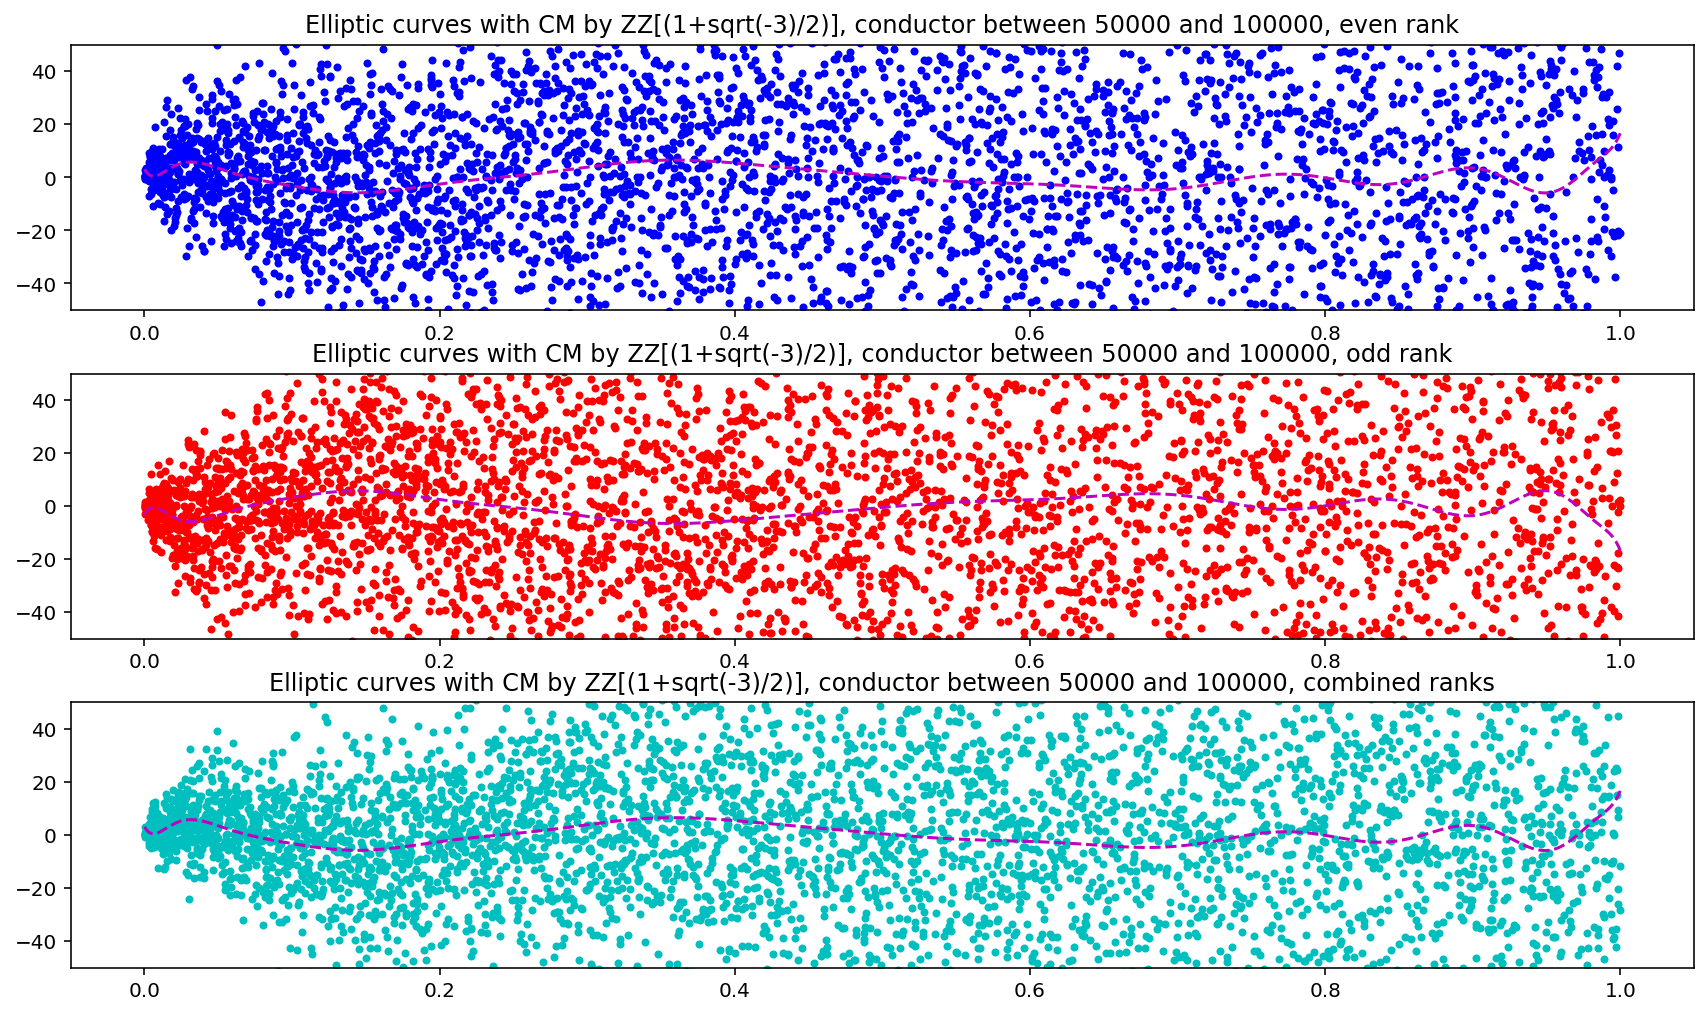

In [6]:
from numpy.polynomial import Polynomial as P
fig, ax = subplots(3);
fig.tight_layout()
ylim = (-50,50)
xlim = None;
scale = 1.0/100000;
t = primes.astype(int)*scale
polyfit = P.fit(t,\
                ec_n3.loc[ec_n3['conductor']>50000].loc[ec_n3['conductor']<100000,primes].mul(ec_n3['rank'],axis=0).mean(),20)
display_murmuration(ec_n3.loc[ec_n3['conductor']>50000].loc[ec_n3['conductor']<100000],\
                    scale,primes,"Elliptic curves with CM by ZZ[(1+sqrt(-3)/2)], conductor between 50000 and 100000",ax,
                   xlim,ylim)
ax[0].plot(t,polyfit(t),'m--')
ax[1].plot(t,-polyfit(t),'m--')
ax[2].plot(t,polyfit(t),'m--')

In [7]:
N,n = 2,1000
x = np.linspace(1.0/n,N,n)
sum_aps_even,count_even = bin_murmuration(ec_n3[ec_n3['rank']==1],primes,x)
sum_aps_odd, count_odd = bin_murmuration(ec_n3[ec_n3['rank']==-1],primes,x)

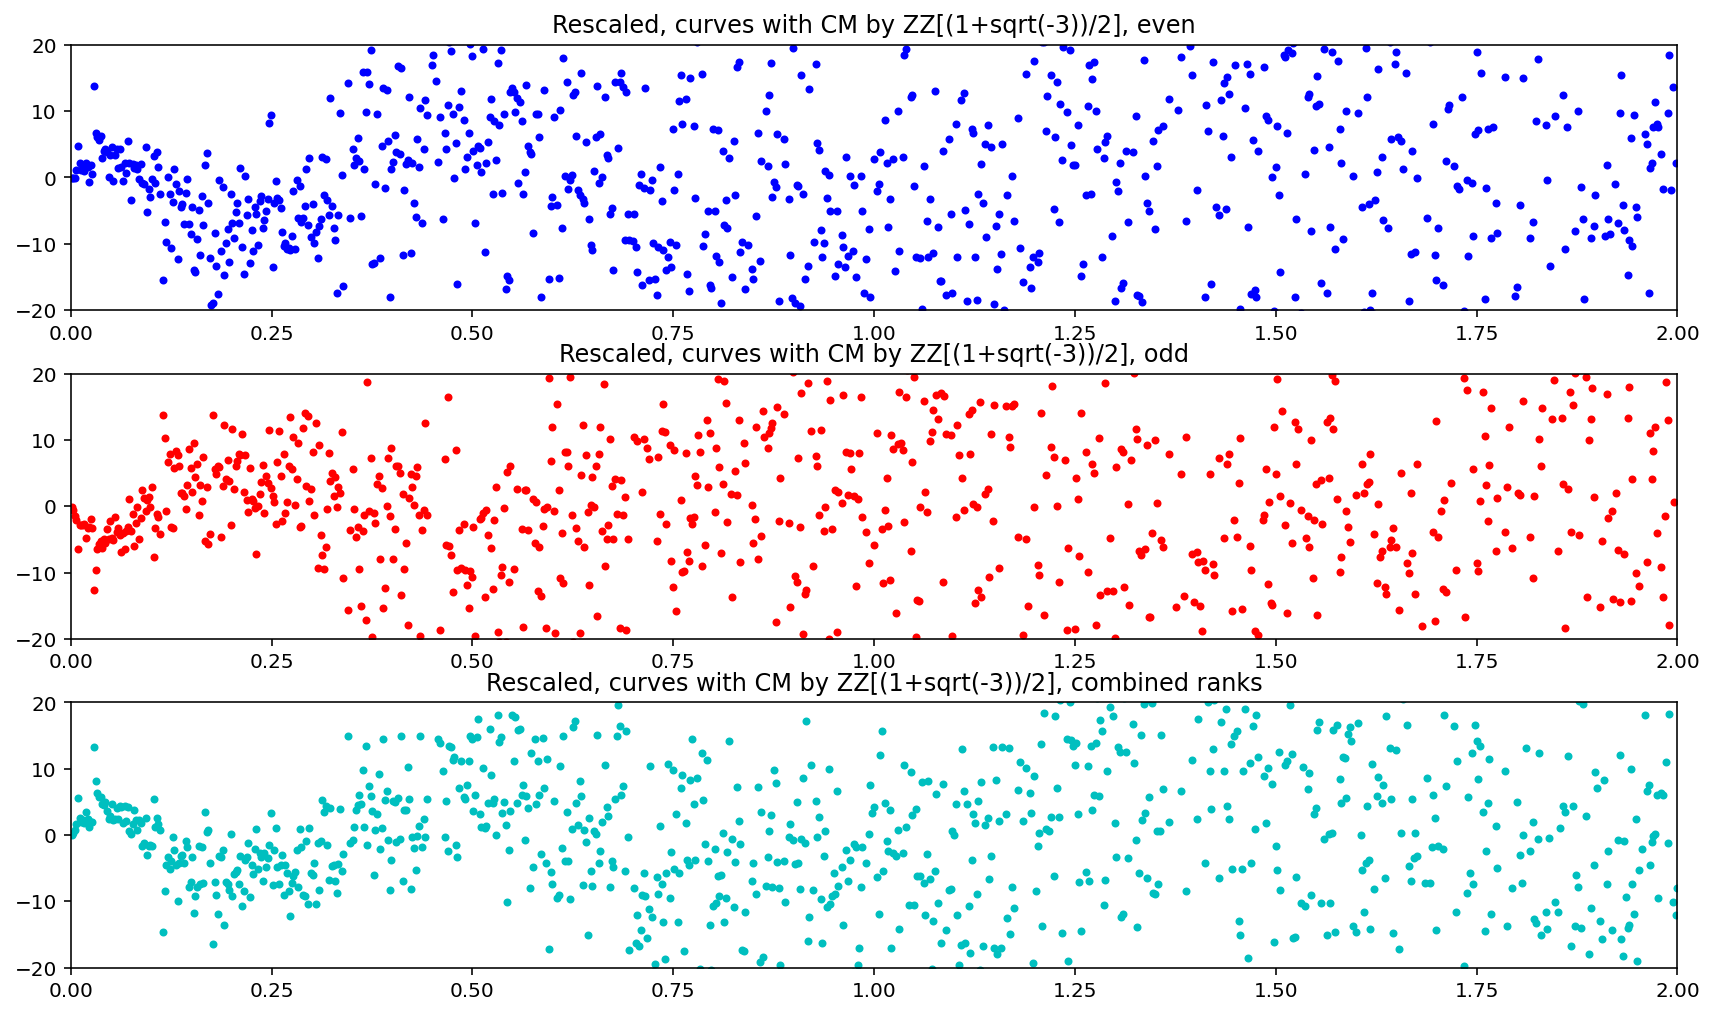

In [8]:
fig2,ax2 = subplots(3);
ylim = (-20,20)
xlim = (0,2)
fig2.tight_layout()
display_rescaled_murmuration(x,sum_aps_even,count_even,sum_aps_odd,count_odd,"Rescaled, curves with CM by ZZ[(1+sqrt(-3))/2]",ax2,xlim,ylim)

In [9]:
file = "sqrt_n1_D_10000_p_100000.data"

## uncomment the next line if using in google colab
## !curl --create-dirs -O --output-dir $local $web_path$local$file

ec_n1 = pd.read_csv(local + file,delimiter=" ",index_col = 'D',usecols=lambda x:x!='discriminant',dtype = datatype)
ec_n1.head()

,conductor,rank,5,13,17,29,37,41,53,61,...,99809,99817,99829,99833,99877,99881,99901,99929,99961,99989
D,,,,,,,,,,,,,,,,,,,,,
-9999,710968896,2,2,-4,-8,-10,-2,-10,-4,-10,...,344,-192,-596,-304,-158,-632,-630,-440,-312,-460
-9998,6397440256,1,4,6,-2,10,-12,-8,4,12,...,-344,-192,-596,-554,612,-10,52,-454,-312,-460
-9997,3198080288,0,-4,0,2,-4,-2,8,4,-12,...,344,602,596,-554,-612,-632,52,440,-550,-460
-9996,4078368,2,-2,-6,0,-10,-12,-10,-4,12,...,-344,192,-596,304,158,10,-630,454,-550,434
-9995,6393601600,2,0,4,2,-4,-12,-10,-4,10,...,-344,-602,-596,-554,-612,10,-52,-440,550,-460


In [11]:
primes_n1 = ec_n1.columns[2:]
sum_aps_even_n1,count_even_n1 = bin_murmuration(ec_n1[ec_n1['rank']==1],primes_n1,x)
sum_aps_odd_n1, count_odd_n1 = bin_murmuration(ec_n1[ec_n1['rank']==-1],primes_n1,x)

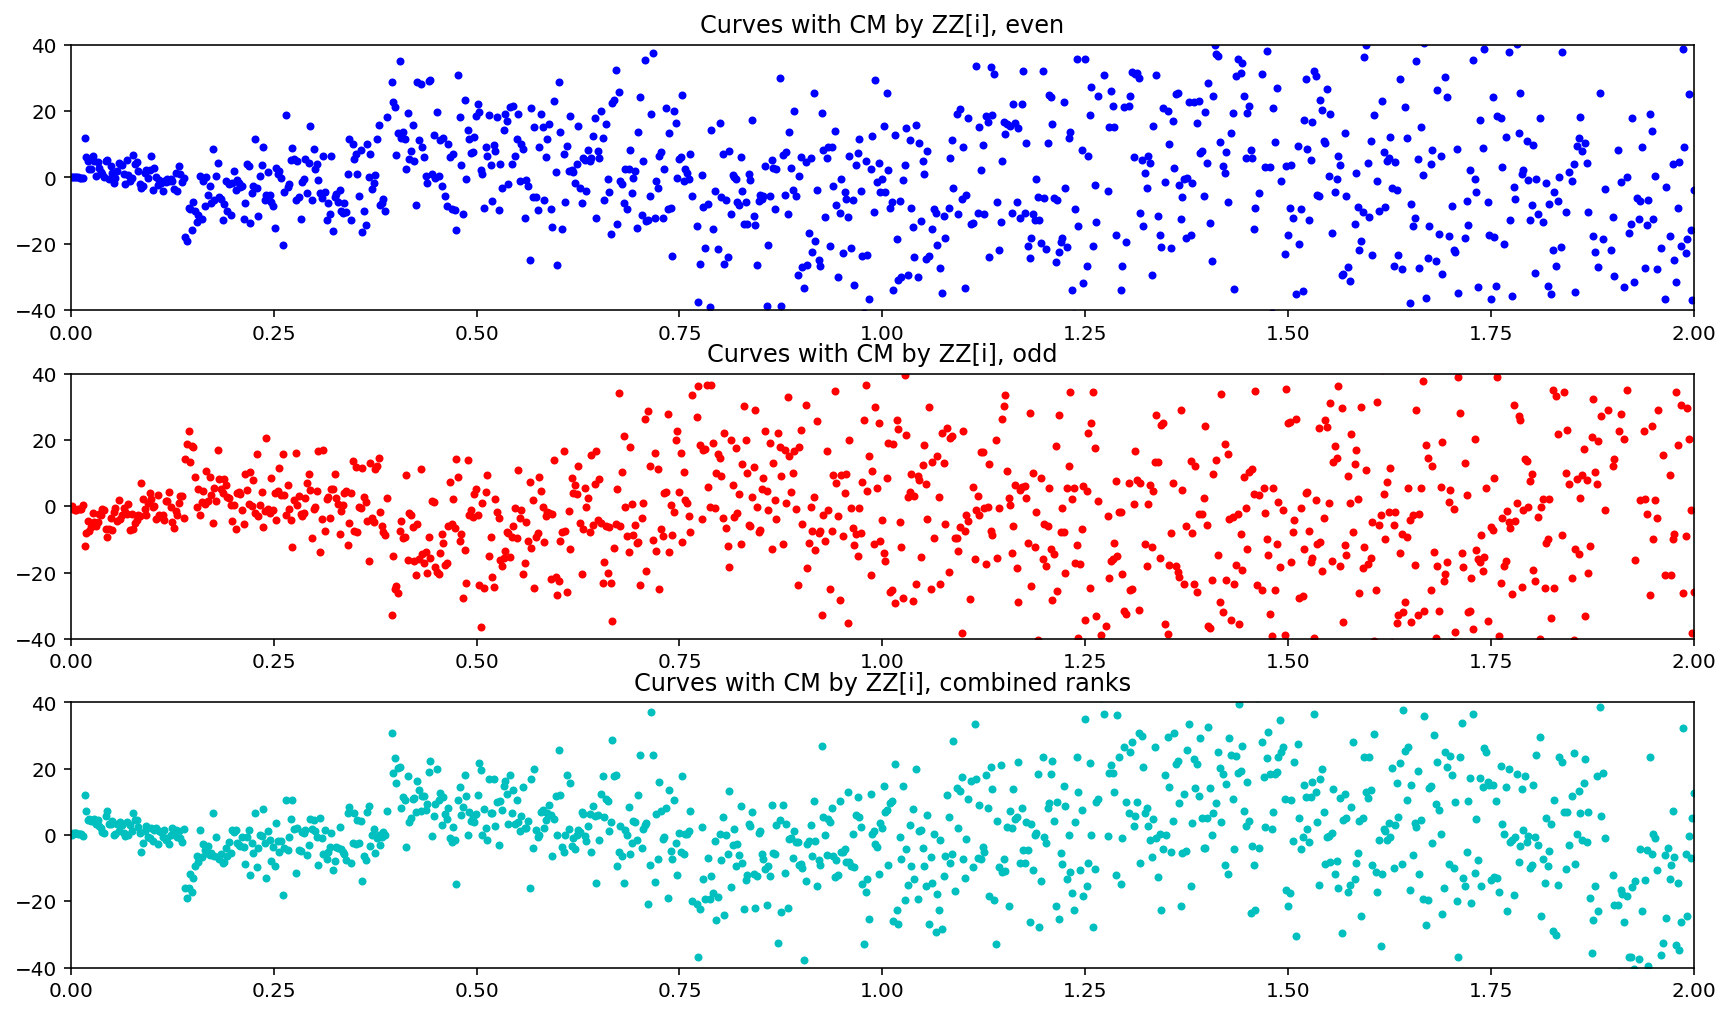

In [12]:
fig3, ax3 = subplots(3);
fig3.tight_layout()
ylim = (-40,40)
xlim = (0,2)
display_rescaled_murmuration(x,sum_aps_even_n1,count_even_n1,sum_aps_odd_n1,count_odd_n1,"Curves with CM by ZZ[i]",ax3,xlim,ylim)

In [13]:
file = "sqrt_n2_D_10000_p_100000.data"

## uncomment the next line if using google colab
## !curl --create-dirs -O --output-dir $local $web_path$local$file

ec_n2 = pd.read_csv(local + file,delimiter=" ",index_col = 'D',usecols=lambda x:x!='discriminant',dtype = datatype)
ec_n2.head()

,conductor,rank,3,11,17,19,41,43,59,67,...,99809,99817,99833,99859,99881,99907,99923,99929,99961,99971
D,,,,,,,,,,,,,,,,,,,,,
-9998,6397440256,1,-2,-6,-6,2,-6,10,6,-14,...,-138,-350,270,238,-282,-386,450,342,586,414
-9997,25584642304,0,2,6,-6,-2,-6,-10,6,-14,...,-138,350,270,-238,282,386,-450,-342,-586,-414
-9995,25574406400,2,-2,-6,-6,2,6,10,-6,14,...,-138,350,270,238,-282,386,450,-342,-586,414
-9994,6392322304,1,2,-6,-6,0,6,10,-6,14,...,-138,-350,270,238,-282,386,-450,342,-586,-414
-9993,25564172544,0,0,6,6,-2,-6,-10,6,-14,...,138,350,270,238,-282,-386,450,342,586,414


In [14]:
primes_n2 = ec_n2.columns[2:];
sum_aps_even_n2,count_even_n2 = bin_murmuration(ec_n2[ec_n2['rank']%2==0],primes_n2,x)
sum_aps_odd_n2, count_odd_n2 = bin_murmuration(ec_n2[ec_n2['rank']%2==1],primes_n2,x)

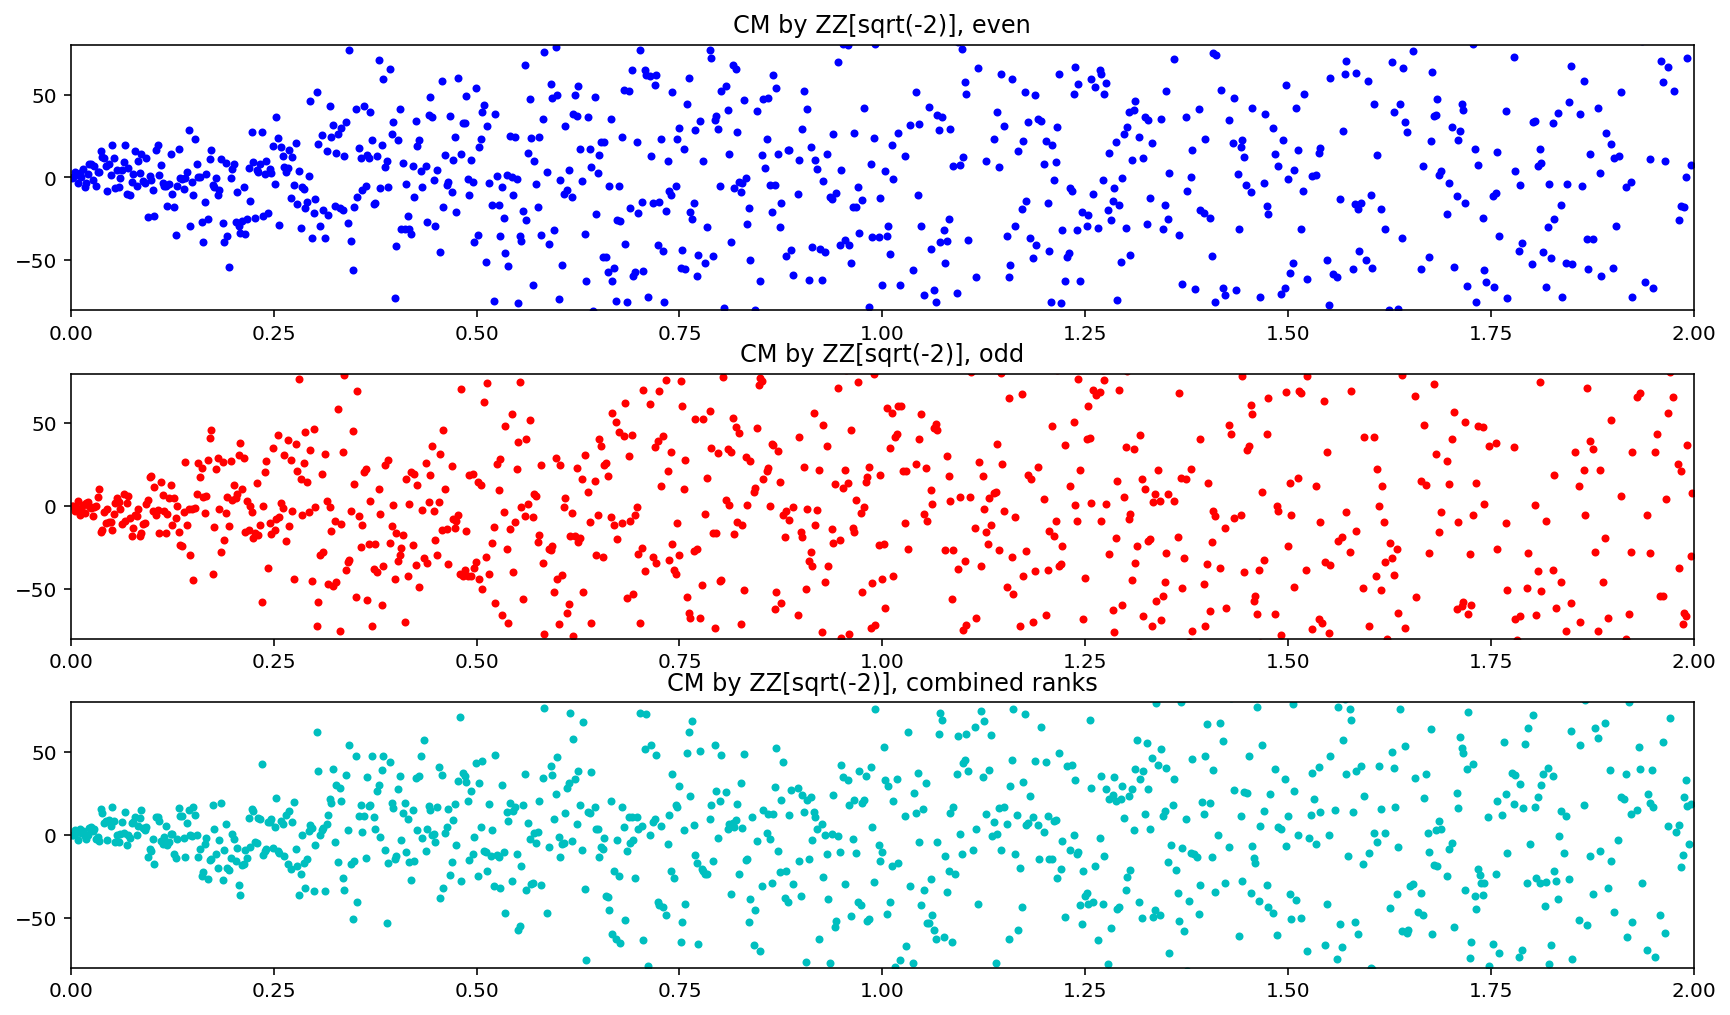

In [15]:
fig4, ax4 = subplots(3);
fig4.tight_layout()
xlim = (0,2)
ylim = (-80,80)
display_rescaled_murmuration(x,sum_aps_even_n2,count_even_n2,sum_aps_odd_n2,count_odd_n2,"CM by ZZ[sqrt(-2)]",ax4,xlim,ylim)

In [16]:
file = "sqrt_n7_D_10000_p_100000.data"

## uncomment the next line if using google colab
## !curl --create-dirs -O --output-dir $local $web_path$local$file

ec_n7 = pd.read_csv(local+file,delimiter=" ",index_col = 'D',usecols=lambda x:x!='discriminant',dtype = datatype)
ec_n7.head()

,conductor,rank,2,11,23,29,37,43,53,67,...,99817,99829,99859,99871,99877,99901,99929,99961,99971,99989
D,,,,,,,,,,,,,,,,,,,,,
-9998,78368643136,1,0,4,-8,2,6,-12,10,-4,...,150,-246,-444,-624,390,-606,-346,-534,172,362
-9997,78352967056,1,0,-4,8,-2,-6,12,10,-4,...,-150,-246,444,-624,390,-606,346,534,-172,362
-9995,4895101225,1,-1,4,-8,-2,6,-12,10,4,...,-150,-246,-444,-624,390,-606,346,534,172,362
-9994,78305948224,1,0,4,-8,-2,-6,-12,10,4,...,150,-246,-444,624,-390,-606,-346,534,-172,362
-9993,78290278416,1,0,-4,8,-2,-6,12,-10,-4,...,-150,246,-444,-624,-390,-606,-346,-534,172,-362


In [17]:
ec_n7.hist(column='conductor',log=True,bins=100)

count    1.216600e+04
mean     1.575977e+10
std      2.166432e+10
min      4.900000e+01
25%      6.266010e+08
50%      3.600900e+09
75%      2.563329e+10
max      7.836864e+10
Name: conductor, dtype: float64

In [18]:
primes_n7 = ec_n7.columns[2:];
sum_aps_even_n7,count_even_n7 = bin_murmuration(ec_n7[ec_n7['rank']%2==0],primes_n7,x)
sum_aps_odd_n7, count_odd_n7 = bin_murmuration(ec_n7[ec_n7['rank']%2==1],primes_n7,x)

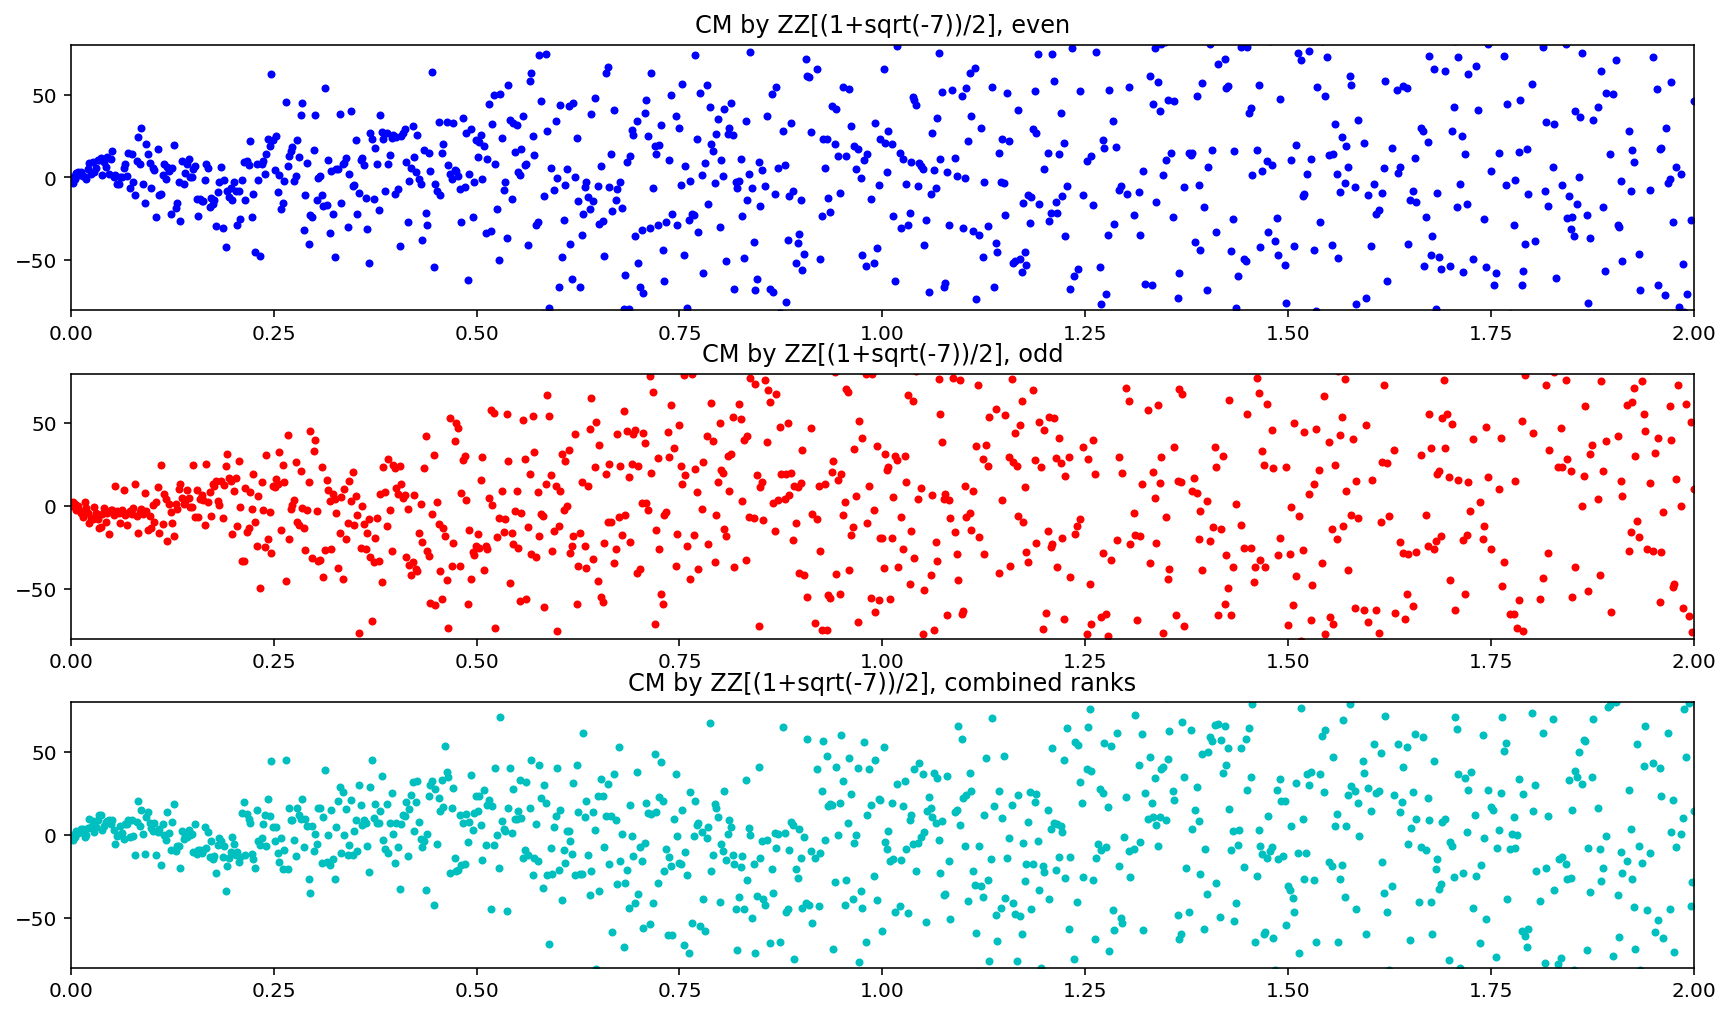

In [19]:
fig5, ax5 = subplots(3);
fig5.tight_layout()
xlim = (0,2)
ylim = (-80,80)
display_rescaled_murmuration(x,sum_aps_even_n7,count_even_n7,sum_aps_odd_n7,count_odd_n7,"CM by ZZ[(1+sqrt(-7))/2]",ax5,xlim,ylim)

In [3]:
file = "rescaled_sqrt_n1_D_2000_P_10000000.data"

## uncomment the next line if using google colab
## !curl --create-dirs -O --output-dir $local $web_path$local$file

ec_short_interval = pd.read_csv("data/rescaled_sqrt_n1_D_2000_P_10000000.data",delimiter=" ",dtype={'x':pd.StringDtype(),'sum_aps_even':int,'count_even':int,'sum_aps_odd':int,'count_odd':int})

NameError: name 'pd' is not defined

In [4]:
ec_short_interval['x'] = ec_short_interval['x'].apply(pd.eval)

NameError: name 'ec_short_interval' is not defined

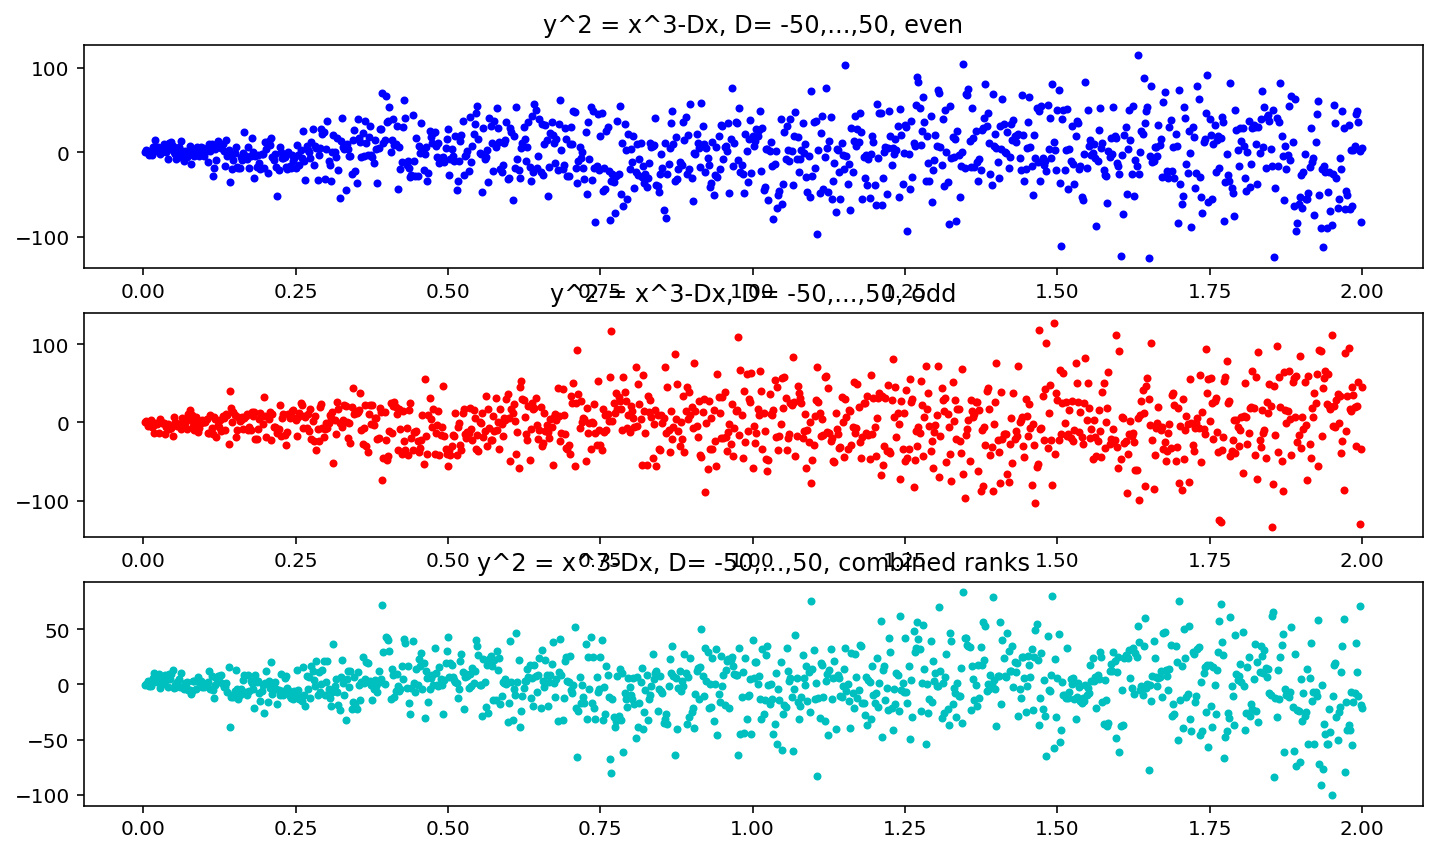

In [97]:
fig6, ax6 = subplots(3);
fig6.tight_layout()
display_rescaled_murmuration(ec_short_interval['x'],ec_short_interval['sum_aps_even'],ec_short_interval['count_even'],ec_short_interval['sum_aps_odd'],ec_short_interval['count_odd'],"y^2 = x^3-Dx, D= -50,...,50",ax6)